In [34]:
from PIL import Image
from os import listdir
from matplotlib import image
import numpy as np
from numpy import asarray
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import itertools

import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
#from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

import IPython.display as ipd
import glob
from scipy.io import wavfile
import numpy as np
import pandas as pd
import librosa
import librosa.display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib as plt
import matplotlib.pyplot as plt
import struct
from scipy.io import wavfile as wav
from scipy.io.wavfile import write
import os
from datetime import datetime 
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
from seaborn import distplot
from seaborn import countplot
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [35]:
# load all images in a directory
n_images=3000;
length=64;
width=64;
class_num=40
i=0
summ=0;
list_imgs=np.zeros((n_images,length,width,3))
loaded_images = list()
for filename in listdir('Executable_Uclass'):
    # load image
    img_data = image.imread('Executable_Uclass/' + filename)
    im = Image.open('Executable_Uclass/' + filename)
    new_image = im.resize((length, width))
    np_im = np.array(new_image)
    #pyplot.imshow(np_im)
    #pyplot.show()
    list_imgs[i,:,:,:] = np.array(np_im);
    loaded_images.append(filename)
    #print('> loaded %s %s' % (filename, np_im.shape))
    summ=summ+1;
    i=i+1
    print(summ)
print(summ);

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063


In [36]:
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues, png_output=None, show=True):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            title='Normalized confusion matrix'
        else:
            title='Confusion matrix'

        # Calculate chart area size
        leftmargin = 0.5 # inches
        rightmargin = 0.5 # inches
        categorysize = 0.5 # inches
        figwidth = leftmargin + rightmargin + (len(classes) * categorysize)           

        f = plt.figure(figsize=(figwidth, figwidth))

        # Create an axes instance and ajust the subplot size
        ax = f.add_subplot(111)
        ax.set_aspect(1)
        f.subplots_adjust(left=leftmargin/figwidth, right=1-rightmargin/figwidth, top=0.94, bottom=0.1)

        res = ax.imshow(cm, interpolation='nearest', cmap=cmap)

        plt.title(title)
        plt.colorbar(res)
        ax.set_xticks(range(len(classes)))
        ax.set_yticks(range(len(classes)))
        ax.set_xticklabels(classes, rotation=45, ha='right')
        ax.set_yticklabels(classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            ax.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

        # plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

        if png_output is not None:
            os.makedirs(png_output, exist_ok=True)
            f.savefig(os.path.join(png_output,'confusion_matrix.png'), bbox_inches='tight')

        if show:
            plt.show()
            plt.close(f)
        else:
            plt.close(f)

In [37]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network

    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [38]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1',
                        kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [39]:
def ResNet50(input_shape=(length, width, 3), classes=class_num):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 (≈3 lines)
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [40]:
modelR = ResNet50(input_shape = (length, width, 3), classes = class_num)
modelR.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelR.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 70, 70, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [130]:
xx=modelR(list_imgs)
xx=xx.numpy()
print(xx)
m1,n1=xx.shape
print(m1,n1)

[[0.00000000e+00 0.00000000e+00 1.56151582e-35 ... 0.00000000e+00
  0.00000000e+00 2.77827114e-35]
 [0.00000000e+00 0.00000000e+00 3.50602853e-34 ... 7.28961201e-37
  0.00000000e+00 6.71175040e-34]
 [0.00000000e+00 0.00000000e+00 2.60936916e-33 ... 1.80637228e-36
  0.00000000e+00 2.71170035e-33]
 ...
 [0.00000000e+00 0.00000000e+00 2.46250139e-35 ... 2.13774975e-38
  0.00000000e+00 5.09694006e-35]
 [0.00000000e+00 0.00000000e+00 5.00350663e-35 ... 8.48196992e-38
  0.00000000e+00 7.75975906e-35]
 [0.00000000e+00 0.00000000e+00 1.45140585e-36 ... 0.00000000e+00
  0.00000000e+00 2.55093341e-36]]
3000 40


In [131]:
#train_test=80
import pandas as pd
yy=pd.read_excel('audio_label_Uclass.xlsx')
# create histogram plot
yy=np.array(yy)
m,n=yy.shape
print(m,n)
print(max(yy))


3000 1
[7]


In [43]:
# ONLY ONCE
df = pd.DataFrame(np.hstack((yy,xx)))
### save to xlsx file
filepath = 'Disfluent_Uclass_changed.xlsx'
df.to_excel(filepath, index=False)
#df = pd.DataFrame(yy)
### save to xlsx file
#filepath = 'Disfluent_labels_Uclass_changed.xlsx'
#df.to_excel(filepath, index=False)

In [89]:
getval=pd.read_excel('Disfluent_Uclass_changed.xlsx')
getval=np.array(getval)
m,n=getval.shape
yy=getval[:,0]
yy=np.array(yy)
m=yy.shape
print(m)
xx=getval[:,1:n]
m1,n1=xx.shape
print(m1,n1)

(3000,)
3000 40


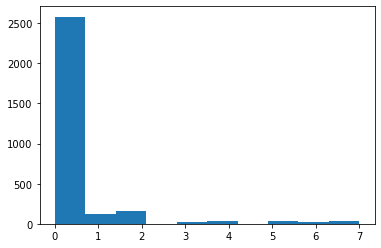

[[2582.]
 [ 118.]
 [ 158.]
 [  20.]
 [  37.]
 [  39.]
 [  17.]
 [  29.]]


In [93]:
classes=7
# load the dataset
# create histogram plot
plt.hist(yy)
Yy=yy[indx[0]]
Yy=np.array(Yy)
# show plot
pyplot.show()
storechange=np.zeros((classes+1,1))
for i  in range(0,classes+1):
    store=np.where(yy==i)[0]
    storechange[i]=float(len(store))
samperclass=min(storechange)
print(storechange)

In [91]:
strings=['target']
for i in range(1,41):
    strings.append('features'+str(i))
print(strings)

['target', 'features1', 'features2', 'features3', 'features4', 'features5', 'features6', 'features7', 'features8', 'features9', 'features10', 'features11', 'features12', 'features13', 'features14', 'features15', 'features16', 'features17', 'features18', 'features19', 'features20', 'features21', 'features22', 'features23', 'features24', 'features25', 'features26', 'features27', 'features28', 'features29', 'features30', 'features31', 'features32', 'features33', 'features34', 'features35', 'features36', 'features37', 'features38', 'features39', 'features40']


In [92]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df_train = pd.DataFrame (yy, columns = ['target'])
df=np.zeros((m1,n1+1))
df[:,0]=yy[:];
df[:,1:]=xx;
df_train=pd.DataFrame(df)
df_train.columns=strings
df_train.tail()

,target,features1,features2,features3,features4,features5,features6,features7,features8,features9,...,features31,features32,features33,features34,features35,features36,features37,features38,features39,features40
2995,2.0,0.015948,0.001172,0.000494,0.001694,0.001569,0.013085,0.315463,0.003014,0.001822,...,0.000254,0.228225,0.000489,0.001286,0.131615,0.000508,0.000318,0.000150,0.001814,0.017935
2996,0.0,0.025925,0.002980,0.011268,0.002054,0.007650,0.032596,0.080263,0.034203,0.002644,...,0.003270,0.376389,0.000965,0.003749,0.028490,0.003405,0.007919,0.000723,0.001524,0.003409
2997,0.0,0.051519,0.005892,0.001251,0.006860,0.002467,0.079824,0.150577,0.073275,0.004452,...,0.000716,0.250087,0.011032,0.002609,0.022323,0.004985,0.004280,0.000597,0.004486,0.012229
2998,0.0,0.010615,0.009366,0.008200,0.010487,0.003804,0.032817,0.064901,0.016323,0.002505,...,0.000635,0.236549,0.001178,0.005116,0.064502,0.008429,0.005849,0.000816,0.002477,0.011336
2999,0.0,0.004581,0.006712,0.013003,0.003654,0.004909,0.041555,0.097621,0.234114,0.004635,...,0.003928,0.222769,0.005963,0.003108,0.033302,0.006957,0.026401,0.002250,0.005541,0.028887


(3000, 40)
(3000,)
[03:53:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 84.67%
[03:53:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 86.22%


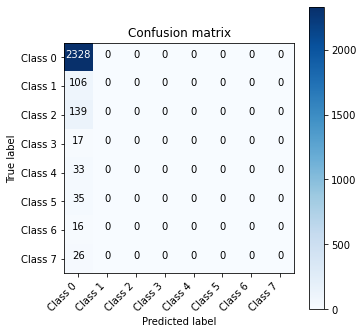

Done


In [149]:
labels = df_train.columns[1:]
X = df_train[labels]
y = df_train['target']
print(X.shape)
print(y.shape)
#X=pd.DataFrame(xx)
#y=pd.DataFrame(yy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

conf_mat = confusion_matrix(y_true=y_train, y_pred=y_pred)
#print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7']
plot_confusion_matrix(conf_mat,labels)
print("Done")

Class=0, n=2582 (12.500%)
Class=4, n=2582 (12.500%)
Class=1, n=2582 (12.500%)
Class=2, n=2582 (12.500%)
Class=7, n=2582 (12.500%)
Class=3, n=2582 (12.500%)
Class=6, n=2582 (12.500%)
Class=5, n=2582 (12.500%)


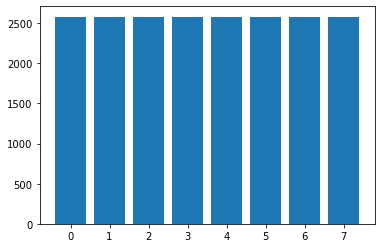

In [54]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 #plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [55]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
20651    7.0
20652    7.0
20653    7.0
20654    7.0
20655    7.0
Name: target, Length: 20656, dtype: float64

In [87]:
df = pd.DataFrame(X)
### save to xlsx file
filepath = 'SMOTE_features_Uclass.xlsx'
df.to_excel(filepath, index=False)
df = pd.DataFrame(y)
### save to xlsx file
filepath = 'SMOTE_labels_Uclass.xlsx'
df.to_excel(filepath, index=False)

In [57]:
#yy=np.array(y)
#xx=np.array(X)
#m2,n2=xx.shape
#print(m2,n2)
#train_test=4500
#temp=yy
#u=len(yy)
#yy=temp[0:train_test]
#YY=temp[train_test:u]
#print(yy.shape)
#print(YY.shape)
#temp=xx
#xx=temp[0:train_test]
#print(xx.shape)
#XX=temp[train_test:m2]
#print(XX.shape)

Class=7, n=2308 (11.174%)
Class=6, n=2314 (11.203%)
Class=2, n=2345 (11.353%)
Class=3, n=2304 (11.154%)
Class=0, n=2318 (11.222%)
Class=4, n=2310 (11.183%)
Class=1, n=2348 (11.367%)
Class=5, n=2343 (11.343%)


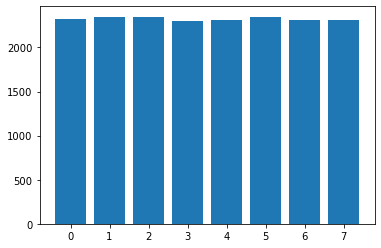

In [60]:
xx=np.array(X)
yy=np.array(y)
xx, XX, yy, YY = train_test_split(X, y, test_size=0.1,shuffle=True)
xx=np.array(xx)
XX=np.array(XX)
yy=np.array(yy)
YY=np.array(YY)
counter = Counter(yy)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 #plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [62]:
temp1=XX*10000000
XX=temp1
XX=XX.astype(int)
print(type(XX))
print(type(XX[0]))
print(type(XX[0][0]))
m1,n1=XX.shape
## Converting form and reshaping
testy=np.reshape(YY,(m1,))
## Changing datatypes
testx=np.empty((m1,),object)
for i in range (0,m1):
    testx[i]=list(int(r) for r in XX[i])
    testy[i]=testy[i].astype(int)
TX=testx
TY=testy
del testx
del testy
print(type(TX))
print(type(TX[0]))
print(type(TX[0][0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'int'>


In [63]:
xx=xx*10000000
xx=xx.astype(int)
print(type(xx))
print(type(xx[0]))
print(type(xx[0][0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.int32'>


In [64]:
max_value=(max([max(element) for element in xx]))
print(min([min(element) for element in xx]))
vocab_size = max_value+1
print(vocab_size)
height,width=xx.shape
maxlen=width
print(maxlen)
samples=height;
print(samples)
Folds=10;
foldlen=int(samples/Folds);
print(foldlen)

0
7543493
40
18590
1859


In [65]:
class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=6):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        ## x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)
        
        ## (batch_size, seq_len, embed_dim)
        key = self.key_dense(inputs) 
        
        ## (batch_size, seq_len, embed_dim)
        value = self.value_dense(inputs) 
        
        ## (batch_size, seq_len, embed_dim)
        query = self.separate_heads(
            query, batch_size
        )  
        ## (batch_size, num_heads, seq_len, projection_dim)
        key = self.separate_heads(
            key, batch_size
        )  
        ## (batch_size, num_heads, seq_len, projection_dim)
        value = self.separate_heads(
            value, batch_size
        )  
        ## (batch_size, num_heads, seq_len, projection_dim)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(
            attention, perm=[0, 2, 1, 3]
        )  
        ## (batch_size, seq_len, num_heads, projection_dim)
        concat_attention = tf.reshape(
            attention, (batch_size, -1, self.embed_dim)
        )  
        ## (batch_size, seq_len, embed_dim)
        output = self.combine_heads(
            concat_attention
        )  
        ## (batch_size, seq_len, embed_dim)
        return output

In [66]:
class TransformerBlock(layers.Layer):
    ## For calling multihead attention on embedded data and arranging it sequentially and adding other layers.
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.01):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)
        
    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [67]:
class TokenAndPositionEmbedding(layers.Layer):
    ## For preliminary token generation and embedding
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [68]:
embed_dim = 30  ## Embedding size for each token
num_heads = 6  ## Number of attention heads
ff_dim = 30  ## Hidden layer size in feed forward network inside transformer

## Tokenizing input data with max dimension and embedding it
inputs = layers.Input(shape=(maxlen,))
#x = keras.Sequential()
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)

## Adding Sequential layer to the embedded data and attention layers too.
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)

## Add other layers
x = layers.Conv1D(6,3,padding="same")(x)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.MaxPool1D(pool_size=2, strides=2)(x)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dropout(0.5)(x)

## Producing general softmax layer for classification
outputs = layers.Dense(8, activation="softmax")(x)

## Generating model
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 40)]              0         
_________________________________________________________________
token_and_position_embedding (None, 40, 30)            226305990 
_________________________________________________________________
transformer_block (Transform (None, 40, 30)            5700      
_________________________________________________________________
conv1d (Conv1D)              (None, 40, 6)             546       
_________________________________________________________________
dense_6 (Dense)              (None, 40, 30)            210       
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 30)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 20, 30)            0     

Epoch 1/2
168/168 [==============================] - 339s 2s/step - loss: 2.1000 - accuracy: 0.1464 - val_loss: 2.0471 - val_accuracy: 0.3034
Epoch 2/2
168/168 [==============================] - 318s 2s/step - loss: 2.0240 - accuracy: 0.2423 - val_loss: 1.9072 - val_accuracy: 0.2695
Training Performance [1.882803201675415, 0.266571044921875]
Testing Performance [1.9071983098983765, 0.2694997191429138]


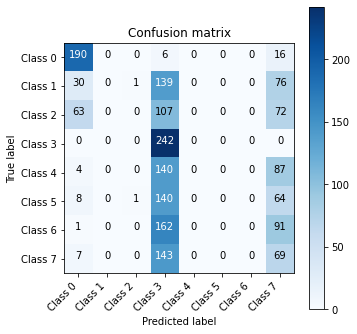

Model Performance [1.8948487043380737, 0.2909002900123596]


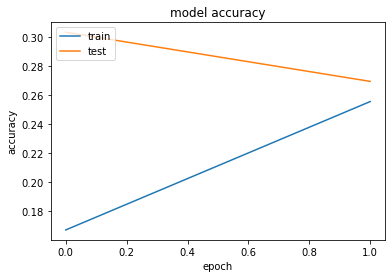

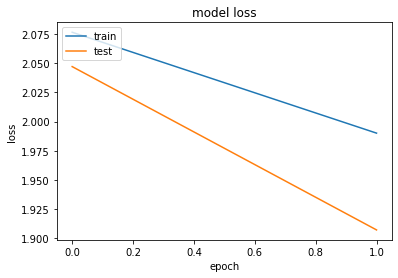

Epoch 1/2
168/168 [==============================] - 323s 2s/step - loss: 1.9090 - accuracy: 0.2970 - val_loss: 1.7609 - val_accuracy: 0.3679
Epoch 2/2
168/168 [==============================] - 321s 2s/step - loss: 1.7229 - accuracy: 0.3334 - val_loss: 1.5439 - val_accuracy: 0.3760
Training Performance [1.533940315246582, 0.4225688874721527]
Testing Performance [1.5438523292541504, 0.3760085999965668]


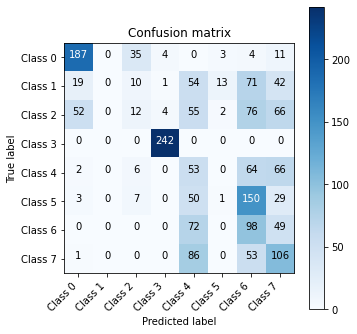

Model Performance [1.5269626379013062, 0.38141337037086487]


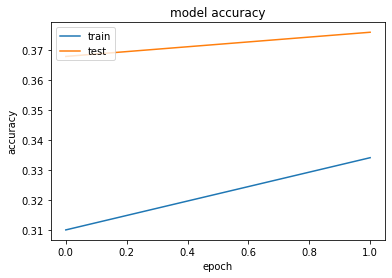

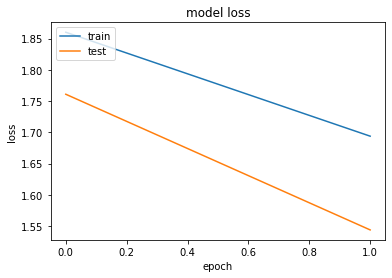

Epoch 1/2
168/168 [==============================] - 326s 2s/step - loss: 1.6023 - accuracy: 0.3493 - val_loss: 1.4838 - val_accuracy: 0.3690
Epoch 2/2
168/168 [==============================] - 322s 2s/step - loss: 1.5342 - accuracy: 0.3797 - val_loss: 1.4463 - val_accuracy: 0.4443
Training Performance [1.359430193901062, 0.5207100510597229]
Testing Performance [1.4463266134262085, 0.44432491064071655]


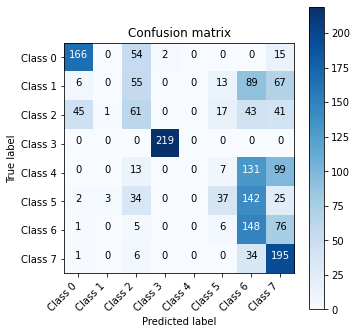

Model Performance [1.478381872177124, 0.3610842227935791]


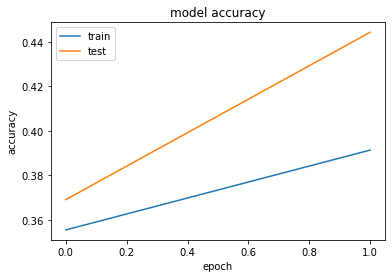

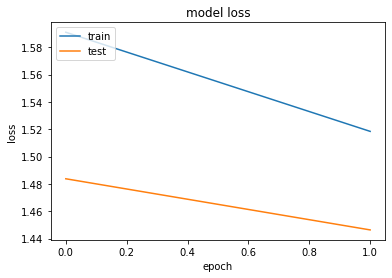

Epoch 1/2
168/168 [==============================] - 323s 2s/step - loss: 1.4223 - accuracy: 0.4481 - val_loss: 1.3019 - val_accuracy: 0.5331
Epoch 2/2
168/168 [==============================] - 318s 2s/step - loss: 1.2766 - accuracy: 0.5028 - val_loss: 1.2307 - val_accuracy: 0.5546
Training Performance [1.0475579500198364, 0.6520829796791077]
Testing Performance [1.2307308912277222, 0.5545992255210876]


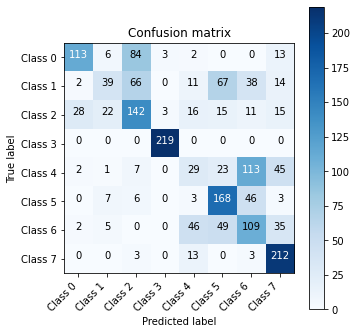

Model Performance [1.5478709936141968, 0.3601161539554596]


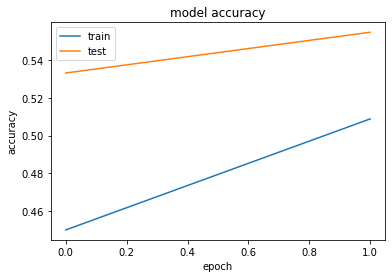

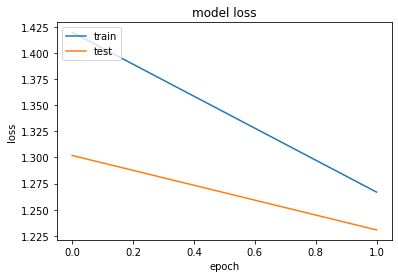

Epoch 1/2
168/168 [==============================] - 321s 2s/step - loss: 1.1932 - accuracy: 0.5407 - val_loss: 0.9972 - val_accuracy: 0.6046
Epoch 2/2
168/168 [==============================] - 317s 2s/step - loss: 1.0610 - accuracy: 0.5899 - val_loss: 0.9905 - val_accuracy: 0.6353
Training Performance [0.889020562171936, 0.7109557390213013]
Testing Performance [0.9905333518981934, 0.6352877616882324]


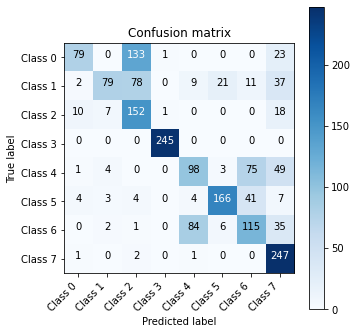

Model Performance [1.6838531494140625, 0.32962244749069214]


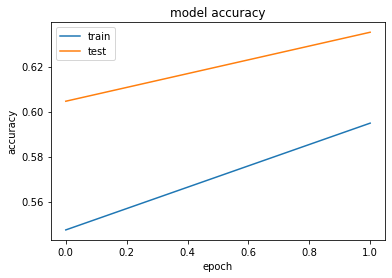

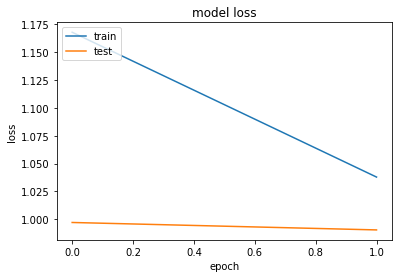

Epoch 1/2
168/168 [==============================] - 322s 2s/step - loss: 0.9834 - accuracy: 0.6271 - val_loss: 0.8402 - val_accuracy: 0.6466
Epoch 2/2
168/168 [==============================] - 327s 2s/step - loss: 0.9057 - accuracy: 0.6696 - val_loss: 0.7391 - val_accuracy: 0.7144
Training Performance [0.705409049987793, 0.7613412141799927]
Testing Performance [0.7391365170478821, 0.7143625617027283]


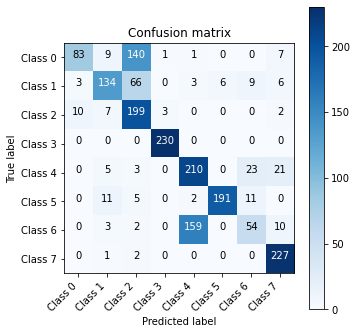

Model Performance [1.73471999168396, 0.32962244749069214]


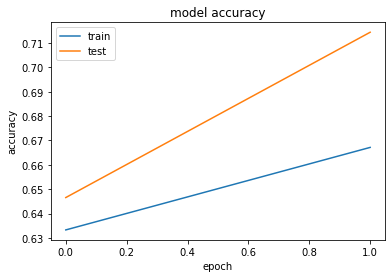

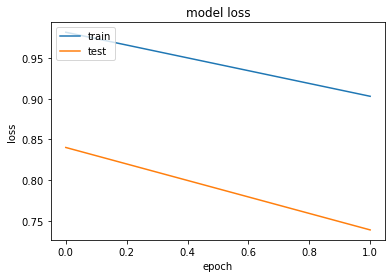

Epoch 1/2
168/168 [==============================] - 331s 2s/step - loss: 0.8743 - accuracy: 0.6926 - val_loss: 0.6711 - val_accuracy: 0.7536
Epoch 2/2
168/168 [==============================] - 325s 2s/step - loss: 0.8090 - accuracy: 0.7327 - val_loss: 0.6213 - val_accuracy: 0.8063
Training Performance [0.5859609246253967, 0.8339011669158936]
Testing Performance [0.6212925910949707, 0.8063474893569946]


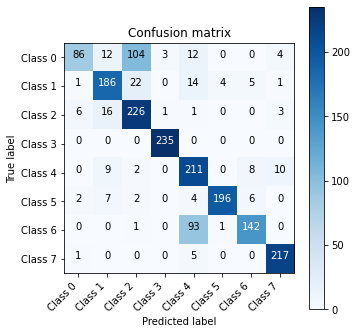

Model Performance [1.9387915134429932, 0.3499515950679779]


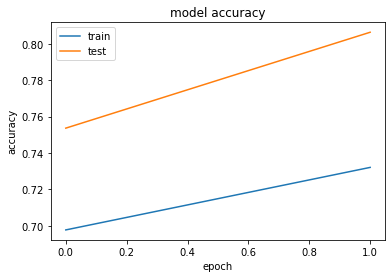

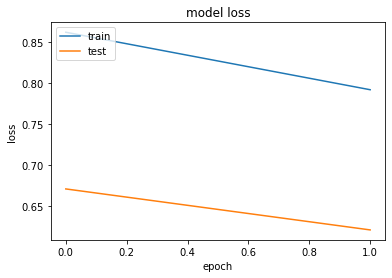

Epoch 1/2
168/168 [==============================] - 330s 2s/step - loss: 0.7737 - accuracy: 0.7491 - val_loss: 0.6052 - val_accuracy: 0.8284
Epoch 2/2
168/168 [==============================] - 328s 2s/step - loss: 0.7341 - accuracy: 0.7591 - val_loss: 0.5409 - val_accuracy: 0.8203
Training Performance [0.5143729448318481, 0.8321678042411804]
Testing Performance [0.5409027934074402, 0.8203335404396057]


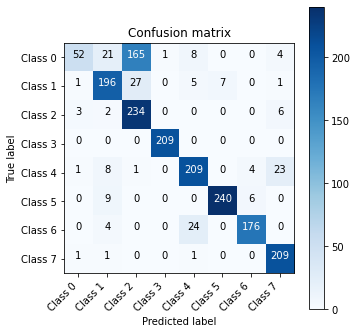

Model Performance [1.9062219858169556, 0.328654408454895]


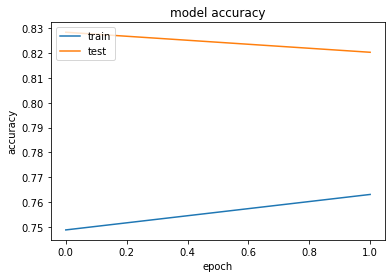

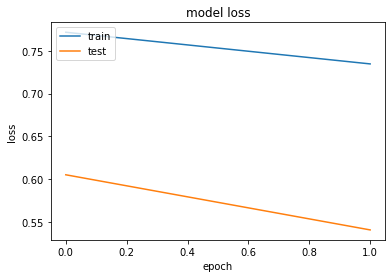

Epoch 1/2
168/168 [==============================] - 321s 2s/step - loss: 0.6846 - accuracy: 0.7743 - val_loss: 0.4969 - val_accuracy: 0.8478
Epoch 2/2
168/168 [==============================] - 326s 2s/step - loss: 0.6398 - accuracy: 0.7927 - val_loss: 0.5219 - val_accuracy: 0.8080
Training Performance [0.48282530903816223, 0.8306735754013062]
Testing Performance [0.5218889713287354, 0.8079612851142883]


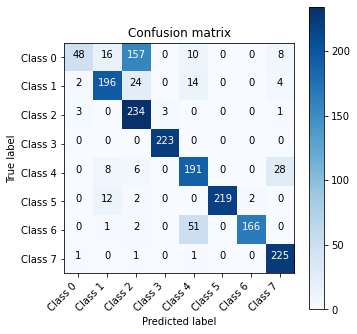

Model Performance [2.212193012237549, 0.3252662122249603]


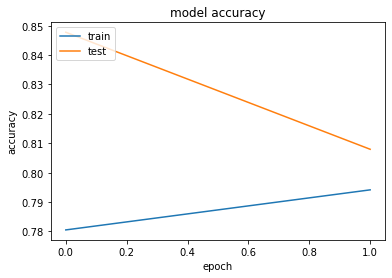

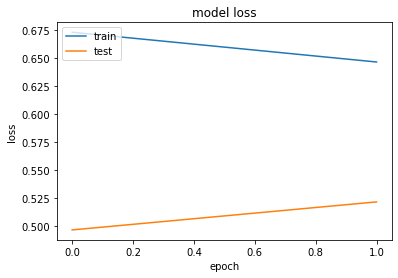

Epoch 1/2
168/168 [==============================] - 329s 2s/step - loss: 0.6493 - accuracy: 0.7970 - val_loss: 0.4240 - val_accuracy: 0.8628
Epoch 2/2
168/168 [==============================] - 327s 2s/step - loss: 0.6192 - accuracy: 0.8052 - val_loss: 0.4116 - val_accuracy: 0.8731
Training Performance [0.41431742906570435, 0.8719741702079773]
Testing Performance [0.41159290075302124, 0.8730500340461731]


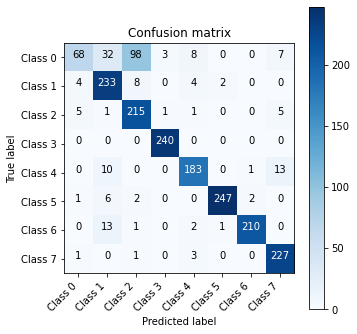

Model Performance [2.237980604171753, 0.3567279875278473]


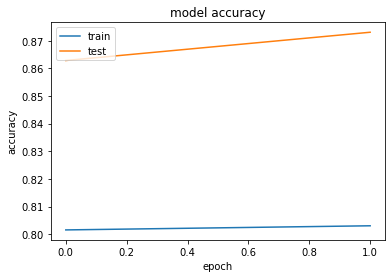

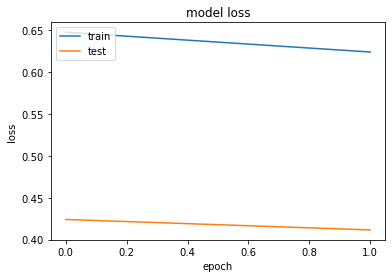

In [69]:
#Cross Validation:
trainacc=[]
testacc=[]
modelacc=[]
for i in range(0,Folds):
    tempmodel=model
    TestX=xx[foldlen*(i):foldlen*(i+1)];
    TestY=yy[foldlen*(i):foldlen*(i+1)];
    testfold=np.arange(foldlen*(i),foldlen*(i+1));
    trainfold=np.arange(0,samples);
    #for j in range(0,foldlen):
    trainfold=np.delete(trainfold,testfold);
    TrainX=xx[trainfold];
    TrainY=yy[trainfold];
    #print(TrainX.shape);
    #print(TestX.shape);
    
    m,n=TestX.shape
    ## Converting form and reshaping
    testy=np.reshape(TestY,(m,))
    ## Changing datatypes
    testx=np.empty((m,),object)
    for i in range (0,m):
        testx[i]=list(int(v) for v in TestX[i])
        testy[i]=testy[i].astype(int)
    ## Printing data-types - relevant to transformer input

    ## Converting Train Data and Getting size of data
    m,n=TrainX.shape
    ## Converting form and reshaping
    trainy=np.reshape(TrainY,(m,))
    ## Changing datatypes
    trainx=np.empty((m,),object)
    for i in range (0,m):
        trainx[i]=list(int(v) for v in TrainX[i])
        trainy[i]=TrainY[i].astype(int)    
    ## Printing data-types - relevant to transformer input
    
    trainx = keras.preprocessing.sequence.pad_sequences(trainx,maxlen=maxlen)
    testx = keras.preprocessing.sequence.pad_sequences(testx,maxlen=maxlen)
    if i==0:
        TX = keras.preprocessing.sequence.pad_sequences(TX,maxlen=maxlen)
    #print(trainx.shape,trainy.shape,testx.shape,testy.shape)
    
    tempmodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    history = tempmodel.fit(trainx, trainy, batch_size=100, epochs=2,validation_data=(testx, testy))
    
    
    score = tempmodel.evaluate(trainx, trainy, verbose=0)
    print("Training Performance",score)
    trainacc.append(score)
    score = tempmodel.evaluate(testx, testy, verbose=0)
    print("Testing Performance",score)
    testacc.append(score)
    
    predicted=tempmodel.predict(testx)
    predicted=np.array(predicted)
    ypred=np.argmax(predicted,axis=1)
    testy=np.array(testy)
    ypred=np.array(ypred)
    conf_mat = confusion_matrix(testy,ypred)
    labels = ['Class 0', 'Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7']
    plot_confusion_matrix(conf_mat,labels)
    
    score = tempmodel.evaluate(TX, TY, verbose=0)
    print("Model Performance",score)
    modelacc.append(score)
    
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    del history
    keras.backend.clear_session()
    del tempmodel

[[1.882803201675415, 0.266571044921875], [1.533940315246582, 0.4225688874721527], [1.359430193901062, 0.5207100510597229], [1.0475579500198364, 0.6520829796791077], [0.889020562171936, 0.7109557390213013], [0.705409049987793, 0.7613412141799927], [0.5859609246253967, 0.8339011669158936], [0.5143729448318481, 0.8321678042411804], [0.48282530903816223, 0.8306735754013062], [0.41431742906570435, 0.8719741702079773]]


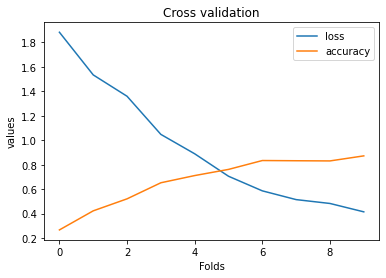

In [70]:
print(trainacc)
plt.plot(trainacc)
plt.title('Cross validation')
plt.ylabel('values')
plt.xlabel('Folds')
plt.yscale('linear')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [71]:
dot_img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


[[1.9071983098983765, 0.2694997191429138], [1.5438523292541504, 0.3760085999965668], [1.4463266134262085, 0.44432491064071655], [1.2307308912277222, 0.5545992255210876], [0.9905333518981934, 0.6352877616882324], [0.7391365170478821, 0.7143625617027283], [0.6212925910949707, 0.8063474893569946], [0.5409027934074402, 0.8203335404396057], [0.5218889713287354, 0.8079612851142883], [0.41159290075302124, 0.8730500340461731]]


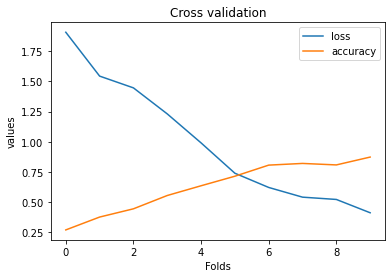

In [72]:
print(testacc)
plt.plot(testacc)
plt.title('Cross validation')
plt.ylabel('values')
plt.xlabel('Folds')
plt.yscale('linear')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

[[1.8948487043380737, 0.2909002900123596], [1.5269626379013062, 0.38141337037086487], [1.478381872177124, 0.3610842227935791], [1.5478709936141968, 0.3601161539554596], [1.6838531494140625, 0.32962244749069214], [1.73471999168396, 0.32962244749069214], [1.9387915134429932, 0.3499515950679779], [1.9062219858169556, 0.328654408454895], [2.212193012237549, 0.3252662122249603], [2.237980604171753, 0.3567279875278473]]


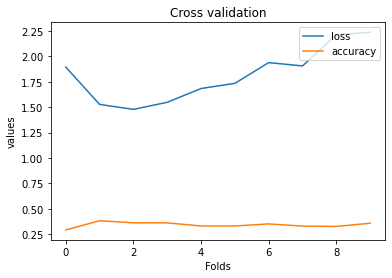

In [73]:
print(modelacc)
plt.plot(modelacc)
plt.title('Cross validation')
plt.ylabel('values')
plt.xlabel('Folds')
plt.yscale('linear')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [76]:
tempmodel=model
tempmodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(trainx, trainy, batch_size=100, epochs=5,validation_data=(testx, testy))

Epoch 1/5
168/168 [==============================] - 329s 2s/step - loss: 0.6140 - accuracy: 0.8166 - val_loss: 0.4169 - val_accuracy: 0.8677
Epoch 2/5
168/168 [==============================] - 326s 2s/step - loss: 0.5712 - accuracy: 0.8200 - val_loss: 0.4314 - val_accuracy: 0.8488
Epoch 3/5
168/168 [==============================] - 326s 2s/step - loss: 0.5705 - accuracy: 0.8236 - val_loss: 0.4542 - val_accuracy: 0.8445
Epoch 4/5
168/168 [==============================] - 327s 2s/step - loss: 0.5643 - accuracy: 0.8336 - val_loss: 0.4251 - val_accuracy: 0.8488
Epoch 5/5
168/168 [==============================] - 316s 2s/step - loss: 0.5406 - accuracy: 0.8319 - val_loss: 0.4042 - val_accuracy: 0.8596


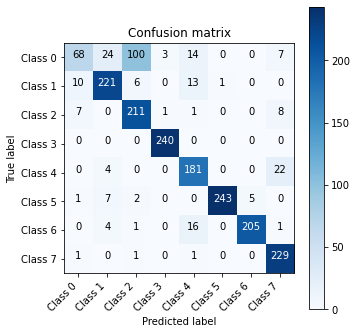

In [80]:
arr=tempmodel.predict(testx)
arr=np.array(arr)
TP=np.argmax(arr,axis=1)
TP=np.array(TP)
TY=np.array(TY)
conf_mat = confusion_matrix(testy,TP)
labels = ['Class 0', 'Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7']
#fig = plt.figure()
#ax = fig.add_subplot(111)
#cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
#fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
#plt.xlabel('Predicted')
#plt.ylabel('Expected')
#plt.figure(figsize=(20, 10))
##plt.show()
plot_confusion_matrix(conf_mat,labels)

In [ ]:
del tempmodel

In [192]:
tempx=X
tempy=y

print(tempy)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2995    2.0
2996    0.0
2997    0.0
2998    0.0
2999    0.0
Name: target, Length: 3000, dtype: float64


8

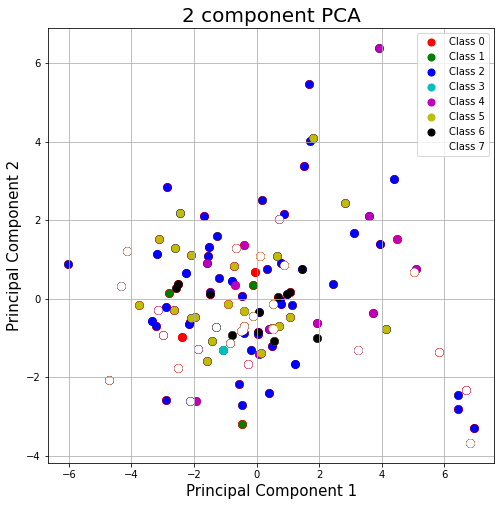

In [193]:
tempx=tempx*100000000
from sklearn.preprocessing import StandardScaler
x_ = StandardScaler().fit_transform(tempx)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


finalDf = principalDf
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0]
colors = ['r', 'g', 'b','c','m','y','k','w']
summa=0
for target, color in zip(targets,colors):
    tempy=np.array(tempy)
    indices = np.where(y==target)
    index=np.array(indices)
    #print(indices.shape)
    summa=summa+len(index)
    ax.scatter(finalDf.loc[indices, 'principal component 1']
               , finalDf.loc[indices, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()
summa

In [194]:
tempx=trainx
tempy=trainy

print(tempy)

[7. 6. 2. ... 2. 2. 0.]


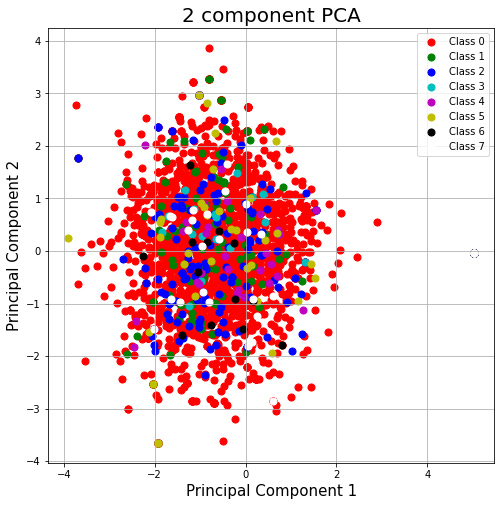

In [195]:
tempx=tempx*100000000
from sklearn.preprocessing import StandardScaler
x_ = StandardScaler().fit_transform(tempx)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


finalDf = principalDf
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0]
colors = ['r', 'g', 'b','c','m','y','k','w']
summa=0
for target, color in zip(targets,colors):
    tempy=np.array(tempy)
    indices = np.where(y==target)
    summa=summa+len(indices)
    ax.scatter(finalDf.loc[indices, 'principal component 1']
               , finalDf.loc[indices, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

In [196]:
tempx=xx
tempy=yy

print(tempy)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


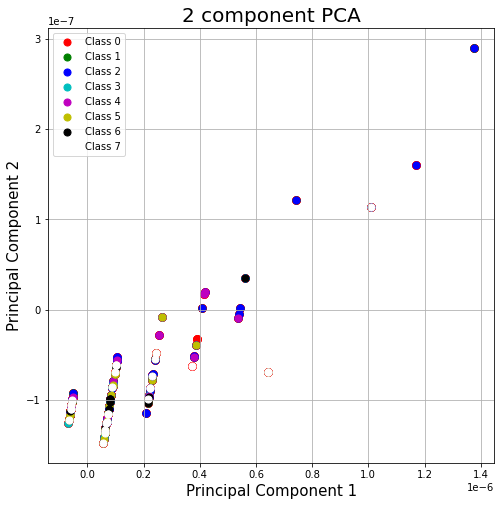

In [197]:
tempx=tempx*100000000
from sklearn.preprocessing import StandardScaler
x_ = StandardScaler().fit_transform(tempx)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(xx)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


finalDf = principalDf
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0]
colors = ['r', 'g', 'b','c','m','y','k','w']
summa=0
for target, color in zip(targets,colors):
    tempy=np.array(tempy)
    indices = np.where(y==target)
    summa=summa+len(indices)
    ax.scatter(finalDf.loc[indices, 'principal component 1']
               , finalDf.loc[indices, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()